In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
nltk.download('vader_lexicon')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
import re
import smart_open
import gensim

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mille\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mille\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mille\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mille\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\mille\anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [10]:
reviews = pd.read_csv('Lumen_Reviews.csv',encoding = "ISO-8859-1")
reviews.head()

,title,position,status,location,date,rating,review,combined
0,Fast paced,Associate Tech Support Specialist II,Former,"Thornton, CO",9-Jul-19,4,"I worked at the Helpdesk, Tier1/2 support. Fa...","Fast paced. I worked at the Helpdesk, Tier1/2..."
1,No growth,Install and Repair Technician,Current,"Dixon, IL",22-Nov-21,1,Company could care less about growing the comp...,No growth. Company could care less about grow...
2,comply with everything we say or your fired,Network Tech,Current,"Cloquet, MN",20-Nov-21,1,Lumen only cares about the bottom line. The em...,comply with everything we say or your fired. ...
3,Lumen is a company in the verge of bankruptcy,Network Technician,Former,"Sierra Vista, AZ",6-Nov-21,1,"Company culture is trash. No security, great p...",Lumen is a company in the verge of bankruptcy....
4,Management could care or less,Network Technician,Former,"Denver, CO",6-Nov-21,1,Management has made it a hostile work place. M...,Management could care or less. Management has...


## VADER

In [11]:
#get polarity scores of the combined title + review
reviews['scores']=reviews['combined'].apply(lambda combined:sid.polarity_scores(combined))
reviews.head()

,title,position,status,location,date,rating,review,combined,scores
0,Fast paced,Associate Tech Support Specialist II,Former,"Thornton, CO",9-Jul-19,4,"I worked at the Helpdesk, Tier1/2 support. Fa...","Fast paced. I worked at the Helpdesk, Tier1/2...","{'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'comp..."
1,No growth,Install and Repair Technician,Current,"Dixon, IL",22-Nov-21,1,Company could care less about growing the comp...,No growth. Company could care less about grow...,"{'neg': 0.16, 'neu': 0.543, 'pos': 0.298, 'com..."
2,comply with everything we say or your fired,Network Tech,Current,"Cloquet, MN",20-Nov-21,1,Lumen only cares about the bottom line. The em...,comply with everything we say or your fired. ...,"{'neg': 0.066, 'neu': 0.697, 'pos': 0.237, 'co..."
3,Lumen is a company in the verge of bankruptcy,Network Technician,Former,"Sierra Vista, AZ",6-Nov-21,1,"Company culture is trash. No security, great p...",Lumen is a company in the verge of bankruptcy....,"{'neg': 0.214, 'neu': 0.665, 'pos': 0.121, 'co..."
4,Management could care or less,Network Technician,Former,"Denver, CO",6-Nov-21,1,Management has made it a hostile work place. M...,Management could care or less. Management has...,"{'neg': 0.121, 'neu': 0.807, 'pos': 0.072, 'co..."


In [12]:
#pull out the compound score into new column
reviews['compound']= reviews['scores'].apply(lambda score_dict: score_dict['compound'])
reviews.head()

,title,position,status,location,date,rating,review,combined,scores,compound
0,Fast paced,Associate Tech Support Specialist II,Former,"Thornton, CO",9-Jul-19,4,"I worked at the Helpdesk, Tier1/2 support. Fa...","Fast paced. I worked at the Helpdesk, Tier1/2...","{'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'comp...",0.9153
1,No growth,Install and Repair Technician,Current,"Dixon, IL",22-Nov-21,1,Company could care less about growing the comp...,No growth. Company could care less about grow...,"{'neg': 0.16, 'neu': 0.543, 'pos': 0.298, 'com...",0.5898
2,comply with everything we say or your fired,Network Tech,Current,"Cloquet, MN",20-Nov-21,1,Lumen only cares about the bottom line. The em...,comply with everything we say or your fired. ...,"{'neg': 0.066, 'neu': 0.697, 'pos': 0.237, 'co...",0.8074
3,Lumen is a company in the verge of bankruptcy,Network Technician,Former,"Sierra Vista, AZ",6-Nov-21,1,"Company culture is trash. No security, great p...",Lumen is a company in the verge of bankruptcy....,"{'neg': 0.214, 'neu': 0.665, 'pos': 0.121, 'co...",-0.7992
4,Management could care or less,Network Technician,Former,"Denver, CO",6-Nov-21,1,Management has made it a hostile work place. M...,Management could care or less. Management has...,"{'neg': 0.121, 'neu': 0.807, 'pos': 0.072, 'co...",-0.2960


In [13]:
#relabel reviews including a neutral level
reviews['VADER_label'] = ''
reviews.loc[reviews.compound>0.10,'VADER_label']='positive'
reviews.loc[(reviews.compound<=0.10) & (reviews.compound >= -0.10),'VADER_label']='neutral'
reviews.loc[reviews.compound<-0.10,'VADER_label']='negative'
reviews.head()

,title,position,status,location,date,rating,review,combined,scores,compound,VADER_label
0,Fast paced,Associate Tech Support Specialist II,Former,"Thornton, CO",9-Jul-19,4,"I worked at the Helpdesk, Tier1/2 support. Fa...","Fast paced. I worked at the Helpdesk, Tier1/2...","{'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'comp...",0.9153,positive
1,No growth,Install and Repair Technician,Current,"Dixon, IL",22-Nov-21,1,Company could care less about growing the comp...,No growth. Company could care less about grow...,"{'neg': 0.16, 'neu': 0.543, 'pos': 0.298, 'com...",0.5898,positive
2,comply with everything we say or your fired,Network Tech,Current,"Cloquet, MN",20-Nov-21,1,Lumen only cares about the bottom line. The em...,comply with everything we say or your fired. ...,"{'neg': 0.066, 'neu': 0.697, 'pos': 0.237, 'co...",0.8074,positive
3,Lumen is a company in the verge of bankruptcy,Network Technician,Former,"Sierra Vista, AZ",6-Nov-21,1,"Company culture is trash. No security, great p...",Lumen is a company in the verge of bankruptcy....,"{'neg': 0.214, 'neu': 0.665, 'pos': 0.121, 'co...",-0.7992,negative
4,Management could care or less,Network Technician,Former,"Denver, CO",6-Nov-21,1,Management has made it a hostile work place. M...,Management could care or less. Management has...,"{'neg': 0.121, 'neu': 0.807, 'pos': 0.072, 'co...",-0.2960,negative


In [14]:
reviews.VADER_label.value_counts()

positive    1011
negative     392
neutral       77
Name: VADER_label, dtype: int64

In [15]:
#label reviews based on rating
reviews['rating_label'] = ''
reviews.loc[reviews.rating>3,'rating_label']='positive'
reviews.loc[reviews.rating == 3,'rating_label']='neutral'
reviews.loc[reviews.rating < 3,'rating_label']='negative'

C:\Users\mille\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mille\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mille\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

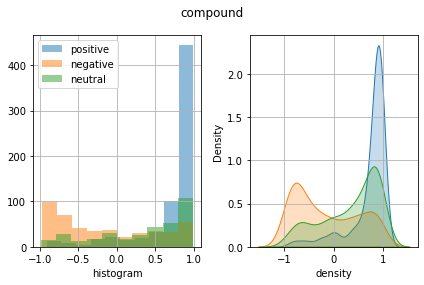

In [16]:
#Checking VADER accuracy
x, y = 'compound', 'rating_label'

fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle(x, fontsize=12)
for i in reviews[y].unique():
    sns.distplot(reviews[reviews[y]==i][x], hist=True, kde=False,
                bins=10, hist_kws={'alpha':0.5},
                axlabel='histogram', ax=ax[0])
    sns.distplot(reviews[reviews[y]==i][x], hist=False, kde=True,
                         kde_kws={'shade':True}, axlabel='density',
                         ax=ax[1])
ax[0].grid(True)
ax[0].legend(reviews[y].unique())
ax[1].grid(True)
fig.tight_layout()
plt.show()

## Text Preprocessing

In [17]:
lst_stopwords = nltk.corpus.stopwords.words('english')
add_to_stopwords = ['get','1','2','3','4','5','6','7','8','9','10','20','le','e','c']
for word in add_to_stopwords:
    lst_stopwords.append(word)
print(lst_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [18]:
def preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    
    #clean - convert to lowercase and remove punctuations and characters then strip
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    
    #Tokenize (convert string to list)
    lst_text = text.split()
    
    #remove stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in lst_stopwords]
        
    #stemming
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
    
    #lemmatization
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
        
    #back to string from list
    text = " ".join(lst_text)
    return text

In [19]:
reviews['cleaned'] = reviews['combined'].apply(lambda x: preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords))

In [20]:
##Checking an example of cleaned text
reviews['cleaned'][0]

'fast paced worked helpdesk tier12 support fast paced little downtime centurylink top heavy bonus merit increase minimal towards end office outsourced india company 17 year dedicated service'

## Text Analytics

In [21]:
#get word counts
reviews['word_count'] = reviews['combined'].apply(lambda x: len(str(x).split(' ')))

#get character counts
reviews['char_count'] = reviews['combined'].apply(lambda x: sum(len(word) for word in str(x).split(' ')))

#get sentence count
reviews['sentence_count'] = reviews['combined'].apply(lambda x: len(str(x).split('.')))

#get average word length
reviews['avg_word_length'] = reviews['char_count'] / reviews['word_count']

#get average sentence length
reviews['avg_sentence_length'] = reviews['word_count'] / reviews['sentence_count']

reviews.head()

,title,position,status,location,date,rating,review,combined,scores,compound,VADER_label,rating_label,cleaned,word_count,char_count,sentence_count,avg_word_length,avg_sentence_length
0,Fast paced,Associate Tech Support Specialist II,Former,"Thornton, CO",9-Jul-19,4,"I worked at the Helpdesk, Tier1/2 support. Fa...","Fast paced. I worked at the Helpdesk, Tier1/2...","{'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'comp...",0.9153,positive,positive,fast paced worked helpdesk tier12 support fast...,51,216,6,4.235294,8.500
1,No growth,Install and Repair Technician,Current,"Dixon, IL",22-Nov-21,1,Company could care less about growing the comp...,No growth. Company could care less about grow...,"{'neg': 0.16, 'neu': 0.543, 'pos': 0.298, 'com...",0.5898,positive,negative,growth company could care le growing company e...,34,135,8,3.970588,4.250
2,comply with everything we say or your fired,Network Tech,Current,"Cloquet, MN",20-Nov-21,1,Lumen only cares about the bottom line. The em...,comply with everything we say or your fired. ...,"{'neg': 0.066, 'neu': 0.697, 'pos': 0.237, 'co...",0.8074,positive,negative,comply everything say fired lumen care bottom ...,51,202,5,3.960784,10.200
3,Lumen is a company in the verge of bankruptcy,Network Technician,Former,"Sierra Vista, AZ",6-Nov-21,1,"Company culture is trash. No security, great p...",Lumen is a company in the verge of bankruptcy....,"{'neg': 0.214, 'neu': 0.665, 'pos': 0.121, 'co...",-0.7992,negative,negative,lumen company verge bankruptcy company culture...,89,378,8,4.247191,11.125
4,Management could care or less,Network Technician,Former,"Denver, CO",6-Nov-21,1,Management has made it a hostile work place. M...,Management could care or less. Management has...,"{'neg': 0.121, 'neu': 0.807, 'pos': 0.072, 'co...",-0.2960,negative,negative,management could care le management made hosti...,43,193,5,4.488372,8.600


In [22]:
reviews.to_csv('cleaned_reviews.csv')

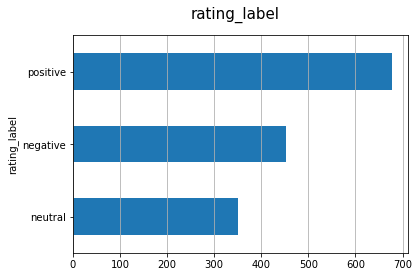

In [23]:
#plotting the review label counts
x = 'rating_label'

fig, ax = plt.subplots()
fig.suptitle(x, fontsize=15)
reviews[x].reset_index().groupby(x).count().sort_values(by='index').plot(kind='barh', legend=False,
                                                                        ax=ax).grid(axis='x')
plt.show()

## One-Sample t-test

In [24]:
import scipy.stats as stats

#Former employee reviews
former_reviews = reviews[reviews['status']=='Former']

#Current employee reviews
current_reviews = reviews[reviews['status']=='Current']

### Review Rating

Hypothesis #1 – the primary sentiment at Lumen is either positive or negative (not neutral).

•	H0: The primary rating of employees working at Lumen is neutral (equal to 3)

•	HA: The primary rating of employees working at Lumen is not neutral (not equal to 3).

In [25]:
#former reviews
avg_former_rating = np.mean(former_reviews.rating)
print(avg_former_rating)

3.217186024551464


In [26]:
#current reviews
avg_current_rating = np.mean(current_reviews.rating)
print(avg_current_rating)

3.147268408551069


In [27]:
avg_rating = np.mean(reviews.rating)
print(avg_rating)

3.1972972972972973


In [28]:
#t-test of former reviews rating  (average = 3)
f_rating_ttest = stats.ttest_1samp(former_reviews.rating, popmean=3)
print(f_rating_ttest)

c_rating_ttest = stats.ttest_1samp(current_reviews.rating, popmean=3)
print(c_rating_ttest)

all_rating_ttest = stats.ttest_1samp(reviews.rating, popmean = 3)
print(all_rating_ttest)

Ttest_1sampResult(statistic=5.2086233140569655, pvalue=2.2856071414522544e-07)
Ttest_1sampResult(statistic=2.335812516954191, pvalue=0.019970822445911744)
Ttest_1sampResult(statistic=5.667838360030197, pvalue=1.7357400628558566e-08)


Hypothesis #2 – the primary sentiment of current employees at Lumen is either positive or negative (not neutral).

•	H0: The primary rating of employees working at Lumen is greater than 3

•	HA: The primary rating of employees working at Lumen is less than 3

In [29]:
#the mean rating of current employees is greater than or equal to 3
print(c_rating_ttest.pvalue / 2)

print(1 - c_rating_ttest.pvalue / 2)

0.009985411222955872
0.9900145887770442


In [30]:
f_rating_ttest.pvalue / 2

1.1428035707261272e-07

### Review Sentiment

In [31]:
avg_former_sent = np.mean(former_reviews.compound)
print(avg_former_sent)

0.3575916902738437


In [32]:
avg_current_sent = np.mean(current_reviews.compound)
print(avg_current_sent)

0.3826669833729217


In [33]:
avg_sentiment = np.mean(reviews.compound)
print(avg_sentiment)

0.36472459459459455


In [34]:
#t-test of former reviews sentiment  (average = 0)
f_sentiment_ttest = stats.ttest_1samp(former_reviews.compound, popmean=0)
print(f_sentiment_ttest)

c_sentiment_ttest = stats.ttest_1samp(current_reviews.compound, popmean=0)
print(c_sentiment_ttest)

Ttest_1sampResult(statistic=17.7445675387887, pvalue=7.161263211903265e-62)
Ttest_1sampResult(statistic=12.756872727067817, pvalue=9.940615397792766e-32)


In [35]:
all_sentiment_ttest = stats.ttest_1samp(reviews.compound, popmean = 0)
print(all_sentiment_ttest)
print(all_sentiment_ttest.pvalue / 2)

Ttest_1sampResult(statistic=21.771397175442335, pvalue=2.195950044330066e-91)
1.097975022165033e-91


### Two-Sample t-test (Current vs Former sentiment)

H0: sentiment between former and current reviews is equal

HA: sentiment between former and current reviews is not equal

In [36]:
#checking variance equality
print((np.var(former_reviews.compound))/ (np.var(current_reviews.compound)))

1.1369119581178613


In [37]:
stats.ttest_ind(a=former_reviews.compound, b=current_reviews.compound, equal_var=True)

Ttest_indResult(statistic=-0.6751723916244543, pvalue=0.49967185297288164)

p-value = 0.43 which is greater than alpha of 0.05, meaning that we fail to reject the null suggesting that sentiment does not differ between current and former employee reviews.

## Word Frequency

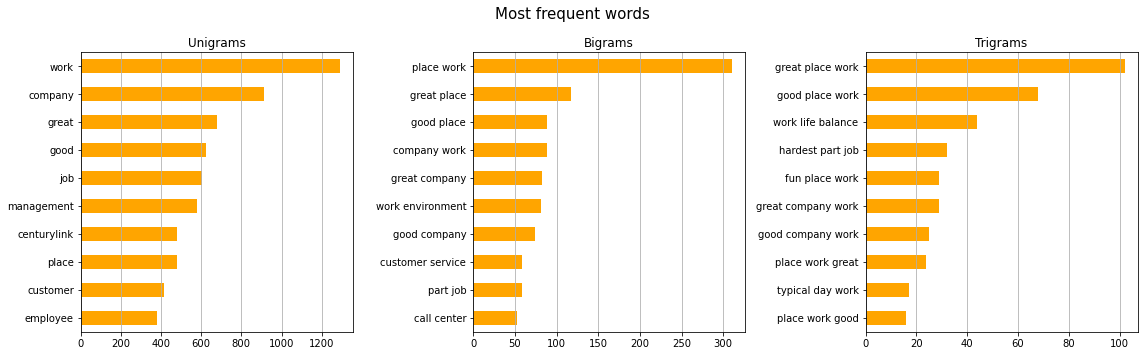

In [38]:
## ALL REVIEWS
corpus = reviews['cleaned']

lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (16,5))
fig.suptitle("Most frequent words", fontsize=15)
    
## unigrams
dic_words_freq = nltk.FreqDist(lst_tokens)
all_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
all_uni.set_index("Word").iloc[:10,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", color = 'orange', ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)
    
## bigrams
dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
all_bi = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
all_bi["Word"] = all_bi["Word"].apply(lambda x: " ".join(
                   string for string in x) )
all_bi.set_index("Word").iloc[:10,:].sort_values(by="Freq").plot(
                  kind="barh", title="Bigrams", color = 'orange', ax=ax[1],
                  legend=False).grid(axis='x')
ax[1].set(ylabel=None)

## trigrams
dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 3))
all_tri = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
all_tri["Word"] = all_tri["Word"].apply(lambda x: " ".join(
                   string for string in x) )
all_tri.set_index("Word").iloc[:10,:].sort_values(by="Freq").plot(
                  kind="barh", title="Trigrams", color = 'orange', ax=ax[2],
                  legend=False).grid(axis='x')
ax[2].set(ylabel=None)

fig.tight_layout()
plt.show()

In [40]:
# Frequency of all words
all_words_freq = nltk.FreqDist(lst_tokens)

all_words = pd.DataFrame(all_words_freq.most_common(), columns=["Word","Freq"])
all_words.set_index("Word").iloc[:,:].sort_values(by="Freq", ascending = False)

filtered_all_words = all_words.loc[(all_words['Freq']>10) & (all_words['Freq'] < 1000)]

In [41]:
print(all_words)

          Word  Freq
0         work  1292
1      company   912
2        great   678
3         good   624
4          job   605
...        ...   ...
4789    wealth     1
4790  exchange     1
4791   offsite     1
4792     bored     1
4793      kill     1

[4794 rows x 2 columns]


In [42]:
print(filtered_all_words)

           Word  Freq
1       company   912
2         great   678
3          good   624
4           job   605
5    management   580
..          ...   ...
642     request    11
643      aspect    11
644      coming    11
645  retirement    11
646       email    11

[646 rows x 2 columns]


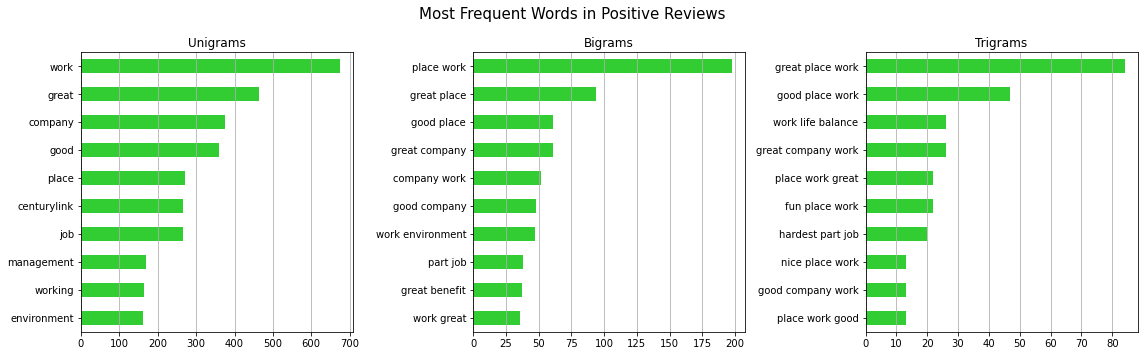

In [43]:
## POSITIVE REVIEWS
pos_corpus = reviews[reviews['rating_label']=='positive']['cleaned']

lst_pos_tokens = nltk.tokenize.word_tokenize(pos_corpus.str.cat(sep=" "))
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (16,5))
fig.suptitle("Most Frequent Words in Positive Reviews", fontsize=15)
                        
                        
## unigrams
dic_words_freq = nltk.FreqDist(lst_pos_tokens)
pos_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
pos_uni.set_index("Word").iloc[:10,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", color = 'limegreen', ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)
    
## bigrams
dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_pos_tokens, 2))
pos_bi = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
pos_bi["Word"] = pos_bi["Word"].apply(lambda x: " ".join(
                   string for string in x) )
pos_bi.set_index("Word").iloc[:10,:].sort_values(by="Freq").plot(
                  kind="barh", title="Bigrams", color = 'limegreen', ax=ax[1],
                  legend=False).grid(axis='x')
ax[1].set(ylabel=None)

## trigrams
dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_pos_tokens, 3))
pos_tri = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
pos_tri["Word"] = pos_tri["Word"].apply(lambda x: " ".join(
                   string for string in x) )
pos_tri.set_index("Word").iloc[:10,:].sort_values(by="Freq").plot(
                  kind="barh", title="Trigrams", color = 'limegreen', ax=ax[2],
                  legend=False).grid(axis='x')
ax[2].set(ylabel=None)

fig.tight_layout()
plt.show()

In [44]:

print(lst_pos_tokens)

['fast', 'paced', 'worked', 'helpdesk', 'tier12', 'support', 'fast', 'paced', 'little', 'downtime', 'centurylink', 'top', 'heavy', 'bonus', 'merit', 'increase', 'minimal', 'towards', 'end', 'office', 'outsourced', 'india', 'company', '17', 'year', 'dedicated', 'service', 'wish', 'pay', 'better', 'overall', 'great', 'work', 'home', 'almost', 'year', 'major', 'advancement', 'need', 'office', 'manager', 'never', 'bothered', 'pay', 'increase', 'low', 'overall', 'good', 'company', 'though', 'great', 'place', 'work', 'youre', 'motivated', 'bad', 'thing', 'report', 'pay', 'could', 'slightly', 'higher', 'laid', 'back', 'place', 'work', 'nice', 'culture', 'work', 'satisfying', 'plant', 'could', 'better', 'thats', 'telecom', 'day', 'great', 'work', 'like', 'balance', 'union', 'benefit', 'lot', 'time', 'thought', 'great', 'company', 'supervisor', 'awesome', 'worked', 'year', 'worked', 'call', 'center', 'call', 'redundant', 'pto', 'vacation', 'time', 'generous', 'company', 'pension', 'drawback', '

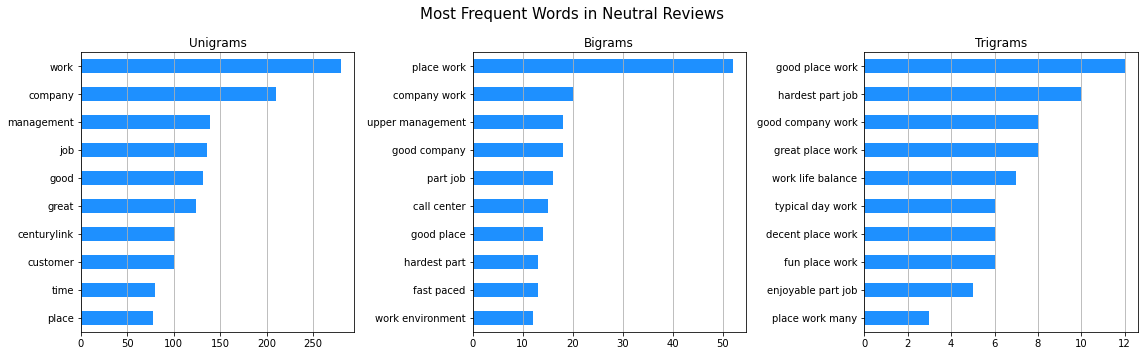

In [45]:
## NEUTRAL REVIEWS
neu_corpus = reviews[reviews['rating_label']=='neutral']['cleaned']

lst_tokens = nltk.tokenize.word_tokenize(neu_corpus.str.cat(sep=" "))
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (16,5))
fig.suptitle("Most Frequent Words in Neutral Reviews", fontsize=15)
    
## unigrams
dic_words_freq = nltk.FreqDist(lst_tokens)
neu_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
neu_uni.set_index("Word").iloc[:10,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", color = 'dodgerblue', ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)
    
## bigrams
dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
neu_bi = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
neu_bi["Word"] = neu_bi["Word"].apply(lambda x: " ".join(
                   string for string in x) )
neu_bi.set_index("Word").iloc[:10,:].sort_values(by="Freq").plot(
                  kind="barh", title="Bigrams", color = 'dodgerblue', ax=ax[1],
                  legend=False).grid(axis='x')
ax[1].set(ylabel=None)

## trigrams
dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 3))
neu_tri = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
neu_tri["Word"] = neu_tri["Word"].apply(lambda x: " ".join(
                   string for string in x) )
neu_tri.set_index("Word").iloc[:10,:].sort_values(by="Freq").plot(
                  kind="barh", title="Trigrams", color = 'dodgerblue', ax=ax[2],
                  legend=False).grid(axis='x')
ax[2].set(ylabel=None)


fig.tight_layout()
plt.show()

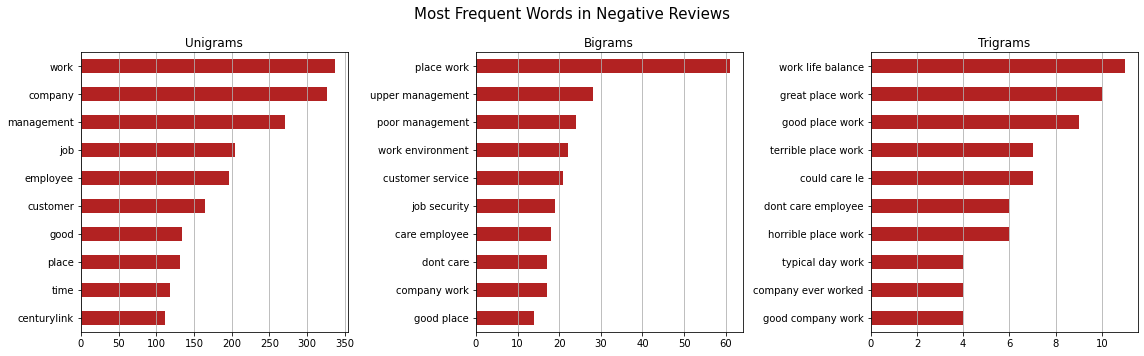

In [46]:
## NEGATIVE REVIEWS
neg_corpus = reviews[reviews['rating_label']=='negative']['cleaned']

lst_tokens = nltk.tokenize.word_tokenize(neg_corpus.str.cat(sep=" "))
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (16,5))
fig.suptitle("Most Frequent Words in Negative Reviews", fontsize=15)

## unigrams
dic_words_freq = nltk.FreqDist(lst_tokens)
neg_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
neg_uni.set_index("Word").iloc[:10,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", color = 'firebrick', ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)

## bigrams
dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
neg_bi = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
neg_bi["Word"] = neg_bi["Word"].apply(lambda x: " ".join(
                   string for string in x) )
neg_bi.set_index("Word").iloc[:10,:].sort_values(by="Freq").plot(
                  kind="barh", title="Bigrams", color = 'firebrick', ax=ax[1],
                  legend=False).grid(axis='x')
ax[1].set(ylabel=None)

## trigrams
dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 3))
neg_tri = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
neg_tri["Word"] = neg_tri["Word"].apply(lambda x: " ".join(
                   string for string in x) )
neg_tri.set_index("Word").iloc[:10,:].sort_values(by="Freq").plot(
                  kind="barh", title="Trigrams", color = 'firebrick', ax=ax[2],
                  legend=False).grid(axis='x')
ax[2].set(ylabel=None)

fig.tight_layout()
plt.show()

## Bag of Words

In [85]:
from sklearn import feature_extraction, manifold
from wordcloud import WordCloud

In [86]:
cleaned_reviews = list(reviews['cleaned'])

In [87]:
print(cleaned_reviews)

['fast paced worked helpdesk tier12 support fast paced little downtime centurylink top heavy bonus merit increase minimal towards end office outsourced india company 17 year dedicated service', 'growth company could care le growing company extremely poor upper management upper management care employee', 'comply everything say fired lumen care bottom line employee expense spread sheet want career company support help succeed keep looking company', 'lumen company verge bankruptcy company culture trash security great pay encourage quit threaten fire every three month suspect company another company soon casualty telecomm industry antiquated technology pride facility real drive mediocrity always company stand back wait crumb big boysi give lumen', 'management could care le management made hostile work place manager untrained job supervising place undue stress employee attempt force tenured employee outdo shut', 'wish pay better overall great work home almost year major advancement need off

In [153]:
lst_unique_wrds = list(cleaned_allwords['Word'])
(lst_unique_wrds)

['work',
 'company',
 'great',
 'good',
 'job',
 'management',
 'place',
 'centurylink',
 'customer',
 'employee',
 'time',
 'people',
 'working',
 'year',
 'get',
 'sale',
 'environment',
 'day',
 'pay',
 'benefit',
 'service',
 'lot',
 'team',
 'worked',
 'manager',
 'would',
 'training',
 'new',
 'culture',
 'call',
 'many',
 'level',
 'like',
 'make',
 'opportunity',
 'dont',
 'fun',
 'always',
 'change',
 'experience',
 'care',
 'one',
 'much',
 'part',
 'need',
 'position',
 'system',
 'really',
 'every',
 'even',
 'best',
 'well',
 'help',
 'go',
 'life',
 'thing',
 'support',
 'could',
 'enjoyed',
 'never',
 'long',
 'issue',
 'bad',
 'business',
 'hard',
 'also',
 'department',
 'process',
 'learn',
 'poor',
 'nice',
 'career',
 'high',
 'going',
 'better',
 'merger',
 'different',
 'hour',
 'want',
 'due',
 'productive',
 'balance',
 'take',
 'coworkers',
 'overall',
 'product',
 'back',
 'know',
 'ever',
 'month',
 'way',
 'supervisor',
 'typical',
 'stressful',
 'able',
 'u

In [116]:
lst_words = []

for sentence in cleaned_reviews:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        lst_words.append(token)

In [117]:
print(lst_words)

['fast', 'paced', 'worked', 'helpdesk', 'tier12', 'support', 'fast', 'paced', 'little', 'downtime', 'centurylink', 'top', 'heavy', 'bonus', 'merit', 'increase', 'minimal', 'towards', 'end', 'office', 'outsourced', 'india', 'company', '17', 'year', 'dedicated', 'service', 'growth', 'company', 'could', 'care', 'le', 'growing', 'company', 'extremely', 'poor', 'upper', 'management', 'upper', 'management', 'care', 'employee', 'comply', 'everything', 'say', 'fired', 'lumen', 'care', 'bottom', 'line', 'employee', 'expense', 'spread', 'sheet', 'want', 'career', 'company', 'support', 'help', 'succeed', 'keep', 'looking', 'company', 'lumen', 'company', 'verge', 'bankruptcy', 'company', 'culture', 'trash', 'security', 'great', 'pay', 'encourage', 'quit', 'threaten', 'fire', 'every', 'three', 'month', 'suspect', 'company', 'another', 'company', 'soon', 'casualty', 'telecomm', 'industry', 'antiquated', 'technology', 'pride', 'facility', 'real', 'drive', 'mediocrity', 'always', 'company', 'stand', '

In [ ]:
## count
lst_grams = [len(word) for word in lst_pos_tokens]
vectorizer = feature_extraction.text.CountVectorizer(
                 vocabulary=lst_unique_words, 
                 ngram_range=(min(lst_grams),max(lst_grams)))

reviews_X = pd.DataFrame(vectorizer.fit_transform(reviews['cleaned']).todense(), columns=lst_unique_words)

## add the new features as columns
term_matrix = pd.concat([reviews['cleaned'], reviews_X.set_index(reviews.index)], axis=1)
term_matrix.head()

In [154]:
## count
lst_grams = [len(word) for word in lst_unique_wrds]
vectorizer = feature_extraction.text.CountVectorizer(
                 vocabulary=lst_unique_wrds, 
                 ngram_range=(min(lst_grams),max(lst_grams)))

reviews_X = pd.DataFrame(vectorizer.fit_transform(reviews['cleaned']).todense(), columns=lst_unique_wrds)

## add the new features as columns
term_matrix = pd.concat([reviews['cleaned'], reviews_X.set_index(reviews.index)], axis=1)
term_matrix.head()

,cleaned,work,company,great,good,job,management,place,centurylink,customer,...,folk,function,crew,quickly,politics,aspect,coming,monday,retirement,email
0,fast paced worked helpdesk tier12 support fast...,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,growth company could care le growing company e...,0,2,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,comply everything say fired lumen care bottom ...,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,lumen company verge bankruptcy company culture...,0,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,management could care le management made hosti...,1,0,0,0,1,2,2,0,0,...,0,0,0,0,0,0,0,0,0,0


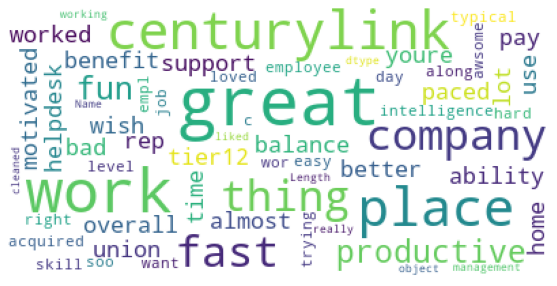

In [71]:
import wordcloud
wc = wordcloud.WordCloud(background_color='white', max_words=100, max_font_size=50)

wc = wc.generate(str(pos_corpus))
fig = plt.figure(num=1, figsize = (10,5))
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

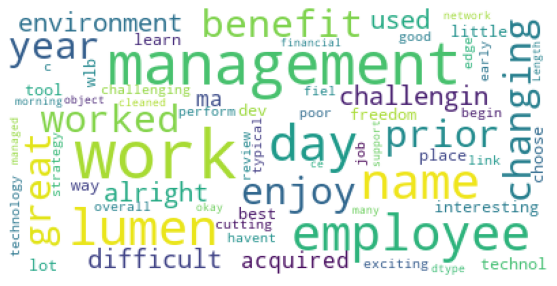

In [70]:
wc = wordcloud.WordCloud(background_color='white', max_words=100, max_font_size=50)

wc = wc.generate(str(neu_corpus))
fig = plt.figure(num=1, figsize = (10,5))
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

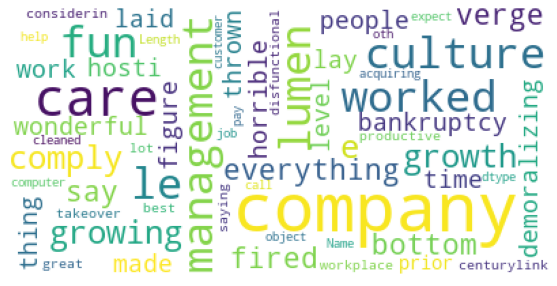

In [72]:
wc = wordcloud.WordCloud(background_color='white', max_words=100, max_font_size=50)

wc = wc.generate(str(neg_corpus))
fig = plt.figure(num=1, figsize = (10,5))
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

## LDA

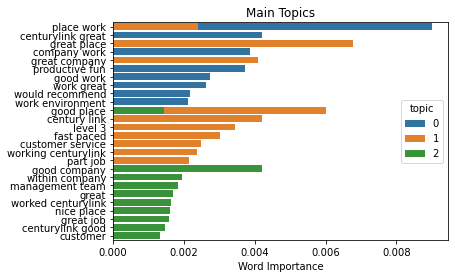

In [168]:
lda_corpus = reviews[reviews['rating_label']=='positive']['cleaned']

## pre-process corpus
lst_corpus = []
for string in lda_corpus:
    lst_words = string.split()
    lst_grams = [" ".join(lst_words[i:i + 2]) for i in range(0, len(lst_words), 2)]
    lst_corpus.append(lst_grams)
    
## map words to an id
id2word = gensim.corpora.Dictionary(lst_corpus)

## create dictionary word:freq
dic_corpus = [id2word.doc2bow(word) for word in lst_corpus] 

## train LDA
lda_model = gensim.models.ldamodel.LdaModel(corpus=dic_corpus, id2word=id2word, num_topics=3, random_state=123, update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)
   
## output
lst_dics = []
for i in range(0,3):
    lst_tuples = lda_model.get_topic_terms(i)
    for tupla in lst_tuples:
        lst_dics.append({"topic":i, "id":tupla[0], 
                         "word":id2word[tupla[0]], 
                         "weight":tupla[1]})
dtf_topics = pd.DataFrame(lst_dics, 
                         columns=['topic','id','word','weight'])
    
## plot
fig, ax = plt.subplots()
sns.barplot(y="word", x="weight", hue="topic", data=dtf_topics, dodge=False, ax=ax).set_title('Main Topics')
ax.set(ylabel="", xlabel="Word Importance")
plt.show()

C:\Users\mille\anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  return safe_unichr(cp)
